In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. Task:

1.fitting it to the periodic function
2.plot the fit Data Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
   Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Temperatures')

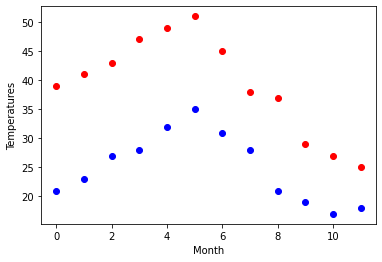

In [2]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, temp_max,'ro')
plt.plot(months, temp_min,'bo')
plt.xlabel('Month')
plt.ylabel('Temperatures')

In [3]:
def temp(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(temp, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(temp, months,
                                      temp_min, [-40, 20, 0])

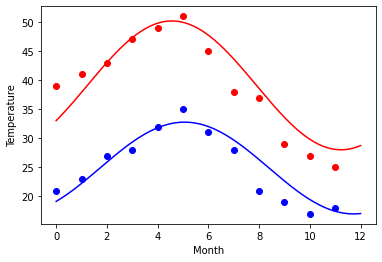

In [4]:
days = np.linspace(0, 12, num=365)

#Plotting

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, temp(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

In [5]:
import pandas as pd

In [6]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
y=np.array(titanic.sex.value_counts())

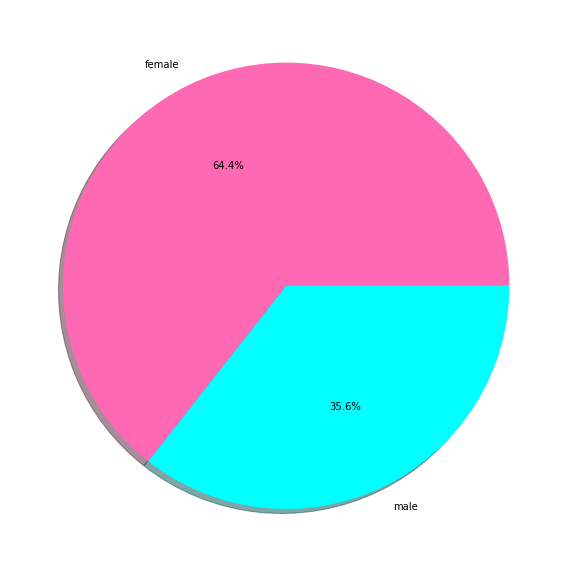

In [8]:
plt.figure(figsize=(10,15))
plt.pie(y,labels=titanic.sex.unique()[0:2],autopct='%1.1f%%',colors=['hotpink','cyan'],shadow=True)
plt.show()

<Figure size 720x1080 with 0 Axes>

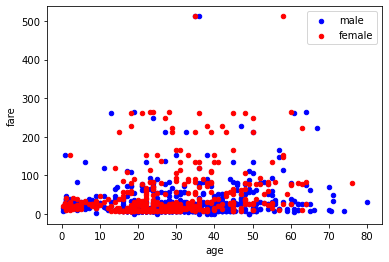

In [9]:
plt.figure(figsize=(10,15))
male=titanic[titanic.sex=='male'].plot.scatter('age','fare',color='blue',label='male')
titanic[titanic.sex=='female'].plot.scatter('age','fare',color='red',label='female',ax=male)
plt.show()